In [4]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [2]:
!jt -t chesterish

In [32]:
!jt -r

Reset css and font defaults in:
C:\Users\AnuAnand\.jupyter\custom &
C:\Users\AnuAnand\AppData\Roaming\jupyter\nbextensions


In [ ]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Installing dependencies

In [7]:
!pip install torch torchvision torchaudio

In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
cd yolov5

C:\PICKLE\Learn\nick\Drowsiness_Detection\yolov5


In [4]:
!pip install -r requirements.txt

  Using cached GitPython-3.1.29-py3-none-any.whl (182 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached gitdb-4.0.10-py3-none-any.whl (62 kB)

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\tqdm-4.62.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.




  Using cached google_auth-2.15.0-py2.py3-none-any.whl (177 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)
  Using cached grpcio-1.51.1-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:


In [5]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [8]:
!pip install tqdm==4.64.0

     -------------------------------------- 78.4/78.4 kB 874.5 kB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\tqdm-4.62.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4.62.3:


In [9]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\AnuAnand/.cache\torch\hub\ultralytics_yolov5_master
requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...
requirements:  Command 'pip install "tqdm>=4.64.0"  ' returned non-zero exit status 1.
YOLOv5  2022-12-27 Python-3.9.7 torch-1.13.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [5]:
img = 'https://www.thehitavada.com/Encyc/2021/9/30/2_09_50_38_VIT-Vellore-_1_H@@IGHT_499_W@@IDTH_887.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 499x887 7 persons, 1 backpack, 1 handbag
Speed: 865.2ms pre-process, 610.5ms inference, 29.0ms NMS per image at shape (1, 3, 384, 640)


In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

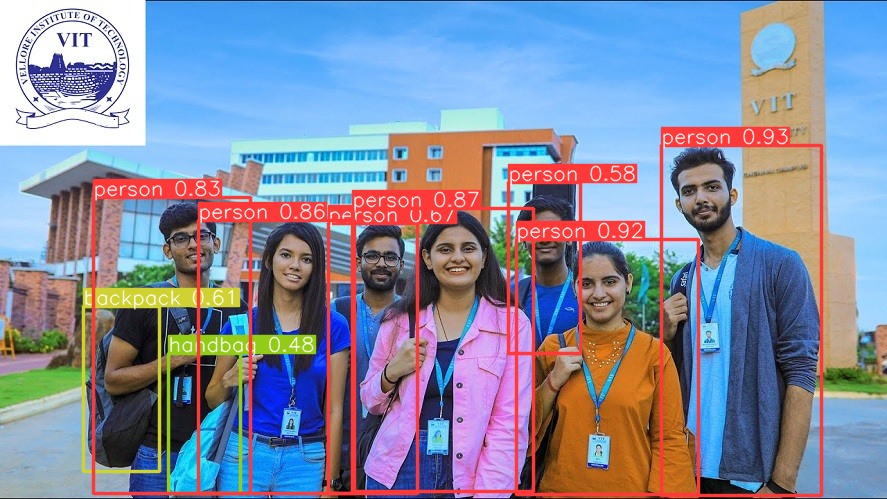

In [17]:
results.show()


In [9]:
#Real Time Detections

In [5]:
# cap = cv2.VideoCapture('check.mp4')
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #MAke detections
    results = model(frame)
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
#Train from Scratch

In [3]:
import uuid   #unique identifier to name images
import os
import time

In [4]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake','drowsy']
number_imgs = 20

In [9]:
cap = cv2.VideoCapture(0)
#loop labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    #loop images
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        #webcam feed
        ret, frame = cap.read()
        
        #naming the imagepath
        imgname =  os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1()) + '.jpg')
        
        # writes out the image to file
        cv2.imwrite(imgname, frame)
        
        # render to the screen
        cv2.imshow("Image Collection", frame)
        
        # delay between the captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [10]:
!git clone https://github.com/heartexlabs/labelImg

Cloning into 'labelImg'...


In [11]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 6.8/6.8 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 3.9/3.9 MB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB ? eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\lxml-4.6.3.dist-info\\direct_url.json'
Consider using the `--user` option or check the permissions.



     ---------------------------------------- 50.1/50.1 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.3
    Uninstalling lxml-4.6.3:


In [6]:
!pip install tensorboard


  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached google_auth-2.15.0-py2.py3-none-any.whl (177 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached grpcio-1.51.1-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)


  Using cached protobuf-3.20.3-cp39-cp39-win_amd64.whl (904 kB)
  Using cached cachetools-5.2.0-py3-none-any.whl (9.3 kB)
  Using cached rsa-4.9-py3-none-any.whl (34 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


In [22]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt 

In [11]:
!cd yolov5

The system cannot find the path specified.


In [14]:
!python train.py --img 640 --batch 16 --epochs 3 --data dataset.yml --weights yolov5s.pt --nosave --cache